<a href="https://colab.research.google.com/github/azal17/encoder/blob/main/analog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter signal type (Analog or Digital): analog
Enter the file path containing the analog signal (image): /content/analog.png
Choose encoding type (PCM or DM): pcm
Choose line encoding scheme (L for NRZ-L, I for NRZ-I, M for Manchester, DM for Differential Manchester, AMI for AMI): L


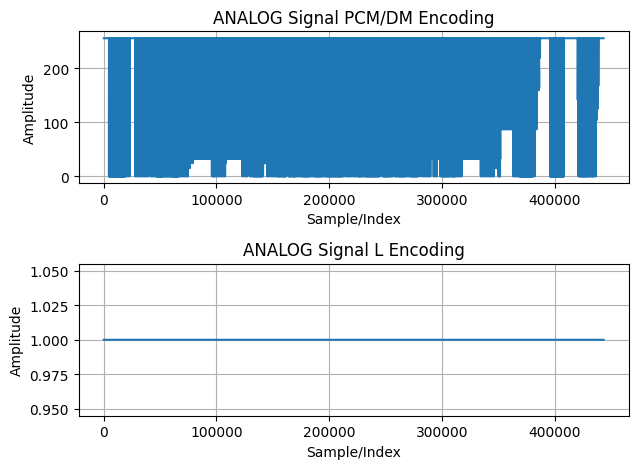

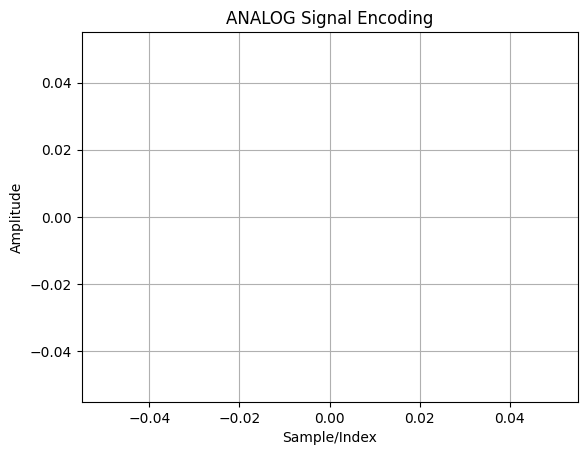

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def nrz_l_encoding(data):
    return [-1 if bit == '0' else 1 for bit in data]

def nrz_i_encoding(data):
    encoded_signal = []
    level = 1
    for bit in data:
        encoded_signal.append(level)
        level *= -1 if bit == '1' else 1
        encoded_signal.append(level)
    return encoded_signal

def manchester_encoding(data):
    return [[-1, 1] * len(data) if bit ==  '0' else [1, -1] * len(data) for bit in data]

def differential_manchester_encoding(data):
    encoded_signal = []
    last_bit = '0'
    for bit in data:
        if bit == '0':
            encoded_signal.extend([-1, 1])
            last_bit = '0'
        else:
            encoded_signal.extend([1, -1] if last_bit == '0' else [-1, 1])
            last_bit = '1'
    return encoded_signal

def ami_encoding(data, scramble=False, scramble_type=None):
    encoded_signal = []
    level = 1
    for bit in data:
        encoded_signal.append(0 if bit == '0' else level)
        level *= -1 if bit == '1' else 1

    if scramble:
        if scramble_type == 'B8ZS':
            for i in range(len(encoded_signal) - 7):
                if all(encoded_signal[i:i + 8] == [0, 0, 0, 0, 0, 0, 0, 0]):
                    encoded_signal[i + 4:i + 8] = [1, 1, 1, -1]
        elif scramble_type == 'HDB3':
            for i in range(len(encoded_signal) - 3):
                if all(encoded_signal[i:i + 4] == [0, 0, 0, 0]):
                    encoded_signal[i + 3] = -encoded_signal[i + 3] if sum(encoded_signal[i:i + 3]) % 2 == 0 else encoded_signal[i + 3]
                elif encoded_signal[i:i + 4] == [0, 0, 0, 1]:
                    encoded_signal[i + 3] = -encoded_signal[i + 3]
    return encoded_signal

def pcm_dm_encoding(analog_data, encoding_type='PCM'):
    if encoding_type.upper() == 'PCM':
        return [round(sample) for sample in analog_data]
    elif encoding_type.upper() == 'DM':
        return [analog_data[0]] + [analog_data[i] - analog_data[i - 1] for i in range(1, len(analog_data))]
    else:
        print("Invalid encoding type. Please choose 'PCM' or 'DM'.")
        return

def read_analog_signal_from_image(file_path):
    try:
        with open(file_path, 'rb') as image_file:
            image = Image.open(image_file).convert('L')
        return list(image.getdata())
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def main():
    signal_type = input("Enter signal type (Analog or Digital): ")
    encoded_signal = []

    if signal_type.upper() == 'ANALOG':
        file_path = input("Enter the file path containing the analog signal (image): ")
        analog_data = read_analog_signal_from_image(file_path)

        if analog_data:
            encoding_type = input("Choose encoding type (PCM or DM): ")
            pcm_dm_encoded_signal = pcm_dm_encoding(analog_data, encoding_type)
            line_encoding_scheme = input("Choose line encoding scheme (L for NRZ-L, I for NRZ-I, M for Manchester, DM for Differential Manchester, AMI for AMI): ")

            if line_encoding_scheme.upper() == 'L':
                line_encoded_signal = nrz_l_encoding(pcm_dm_encoded_signal)
            elif line_encoding_scheme.upper() == 'I':
                line_encoded_signal = nrz_i_encoding(pcm_dm_encoded_signal)
            elif line_encoding_scheme.upper() == 'M':
                line_encoded_signal = manchester_encoding(pcm_dm_encoded_signal)
            elif line_encoding_scheme.upper() == 'DM':
                line_encoded_signal = differential_manchester_encoding(pcm_dm_encoded_signal)
            elif line_encoding_scheme.upper() == 'AMI':
                scramble_option = input("Do you want to apply scrambling for AMI encoding? (Y/N): ")
                if scramble_option.upper() == 'Y':
                    scramble_type = input("Choose scrambling type (B8ZS or HDB3): ")
                    line_encoded_signal = ami_encoding(pcm_dm_encoded_signal, scramble=True, scramble_type=scramble_type)
                else:
                    line_encoded_signal = ami_encoding(pcm_dm_encoded_signal)
            else:
                print("Invalid line encoding scheme. Please choose 'L', 'I', 'M', 'DM', or 'AMI'.")
                return

            plt.subplot(2, 1, 1)
            plt.step(range(len(pcm_dm_encoded_signal)), pcm_dm_encoded_signal)
            plt.xlabel("Sample/Index")
            plt.ylabel("Amplitude")
            plt.title(f"{signal_type.upper()} Signal PCM/DM Encoding")
            plt.grid(True)

            plt.subplot(2, 1, 2)
            plt.step(range(len(line_encoded_signal)), line_encoded_signal)
            plt.xlabel("Sample/Index")
            plt.ylabel("Amplitude")
            plt.title(f"{signal_type.upper()} Signal {line_encoding_scheme.upper()} Encoding")
            plt.grid(True)

            plt.tight_layout()
            plt.show()

    elif signal_type.upper() == 'DIGITAL':
        data = input("Enter binary data: ")
        encoding_scheme = input("Choose encoding scheme (L for NRZ-L, I for NRZ-I, M for Manchester, DM for Differential Manchester, AMI for AMI): ")

        if encoding_scheme.upper() == 'L':
            encoded_signal = nrz_l_encoding(data)
        elif encoding_scheme.upper() == 'I':
            encoded_signal = nrz_i_encoding(data)
        elif encoding_scheme.upper() == 'M':
            encoded_signal = manchester_encoding(data)
        elif encoding_scheme.upper() == 'DM':
            encoded_signal = differential_manchester_encoding(data)
        elif encoding_scheme.upper() == 'AMI':
            scramble_option = input("Do you want to apply scrambling for AMI encoding? (Y/N): ")
            if scramble_option.upper() == 'Y':
                scramble_type = input("Choose scrambling type (B8ZS or HDB3): ")
                encoded_signal = ami_encoding(data, scramble=True, scramble_type=scramble_type)
            else:
                encoded_signal = ami_encoding(data)
        else:
            print("Invalid encoding scheme. Please choose 'L', 'I', 'M', 'DM', or 'AMI'.")
            return
    else:
        print("Invalid signal type. Please choose 'Analog' or 'Digital'.")
        return

    plt.step(range(len(encoded_signal)), encoded_signal)
    plt.xlabel("Sample/Index")
    plt.ylabel("Amplitude")
    plt.title(f"{signal_type.upper()} Signal Encoding")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
